In [2]:
from MNIST import main

D:\miniconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## 1.1 Model introduction

The model is construct based on transformer model's encoder mudule. The Encoder module is used to encode the input sequence into a series of representations for use by subsequent modules. It is stacked by multiple identical layers, and each layer usually consists of two sub-layers: Self-Attention Layer and Feedforward Neural Network. 

The self-attention layer is an important component in the Encoder. It is able to compute a context-sensitive representation for each position in the input sequence. The self-attention mechanism allows the model to model the dependencies between different positions when processing the input sequence, thereby better capturing long-distance dependencies in the sequence. At each position, the self-attention layer computes a weighted representation that takes into account information from all other positions in the input sequence. 

In the self-attention layer, the dimensions of the query, key, and value are usually the same and the same as the dimensions of the input sequence. Assuming that the length of the input sequence is N and the feature dimension of each position is d, the dimensions of the query, key and value are (N, d). Here we also apply multihead self attension mechanism. It maps the input sequence into multiple subspaces and calculates attention weights in each subspace. Finally, the attention-weighted representations of multiple subspaces are combined to obtain the final output representation. The number of head is H.

After the self-attention layer, the Encoder module usually contains a feedforward neural network layer. This feedforward neural network layer usually consists of two linear transformations and a nonlinear activation function, such as ReLU. It acts on the representation at each position and performs non-linear transformation and mapping on the representation, thereby enhancing the expressive ability ofthe model.

The number of model parameter is mainly depend on d and k. For k, we can direct adjust it. For d, we should alter it by different input data format.
![Transformer model](../formulas/transformer.png)

## 1.2 Algorithm

To minimize loss function by backward propogation, we used algorithm Adam. Adam (Adaptive Moment Estimation) is an adaptive learning rate optimization algorithm that combines the characteristics of the momentum method and adaptive learning rate adjustment. It can effectively adjust the learning rate and adaptively adjust the learning rate of each parameter during the train

The Adam algorithm uses the concept of momentum to speed up the gradient descent process. It considers not only the direction of the current gradient but also the direction of previous gradients when updating parameters. This allows for faster movement in parameter space and can help overcome local minima. The Adam algorithm also introduces the concept of adaptive learning rate. It maintains an adaptive learning rate for each parameter, which is adjusted based on the first moment estimate (mean) and second moment estimate (variance) of the parameter's gradient. This allows the learning rate of each parameter to dynamically adapt to parameter updates during the training process.

When using the Adam optimizer in PyTorch, we can adjust several parameters to achieve better performance:
lr (learning rate): controls the step size of parameter update.  
betas (exponential decay rate of momentum and squared gradient terms): adjust the direction and size of parameter updates.  
eps (numeric stability parameter): prevents divide-by-zero errors.  
weight_decay: Penalizes the size of model parameters to reduce overfitting.  

In our MNIST example, we use MSE difference between input and output as the loss function. The expect output should be very similar to the input image.

## 1.3 Dataset
The MNIST (Mixed National Institute of Standards and Technology) dataset is a commonly used handwritten digit recognition dataset used to train and test machine learning models. It consists of images of handwritten digits from the National Institute of Standards and Technology, including the digits 0 to 9. Each image is a 28x28 pixel grayscale image representing a handwritten digit.

The MNIST dataset is commonly used to test and evaluate image classification algorithms and models. Due to its simplicity and standardization, it has become one of the benchmark datasets in the field of machine learning. Many studies and experiments use the MNIST dataset to verify the performance of new algorithms or models.

Its training image set contains 60,000 images of handwritten digits used to train the model. Here, we selected 20,000 of them for model training.

## Result
From last experiment, we found that model performance is related to model settings and data input format. Also,with same performance, we want to choose the model with less parameters. This is because For more complex sturcture or massive dataset, we want to minimize the number of parameters to reduce caculation complexity.
In this section, we will evaluate and visualzie the performance of model with different model.

# 2.1 Test performance with different d

In this section, we try to alter and test model with different d by modifying the block size and stride length. Based on the result from last experiment, we choose contact blocks horizontally while allowing blocks to overlap. Therefore, the size of input dataset should be:  
n= blocksize;
d = number of blocks * blocksize  
Four different settings are tested here.

1. We set block size to be 4 and stride to be 3. The dimension d is 324.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.174
epochs:[0],iteration:[250]/[1000],loss:0.078
epochs:[0],iteration:[500]/[1000],loss:0.078
epochs:[0],iteration:[750]/[1000],loss:0.085
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.088
epochs:[1],iteration:[250]/[1000],loss:0.072
epochs:[1],iteration:[500]/[1000],loss:0.075
epochs:[1],iteration:[750]/[1000],loss:0.084
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.087
epochs:[2],iteration:[250]/[1000],loss:0.071
epochs:[2],iteration:[500]/[1000],loss:0.074
epochs:[2],iteration:[750]/[1000],loss:0.083
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.087
epochs:[3],iteration:[250]/[1000],loss:0.071
epochs:[3],iteration:[500]/[1000],loss:0.074
epochs:[3],iteration:[750]/[1000],loss:0.083
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.086
epochs:[4],iteration:[250]/[1000],loss:0.070
epochs:[4],iteration:[500]/[1000],loss:0.074
epochs:[4],iteration:[750]/[1000],loss:0.083


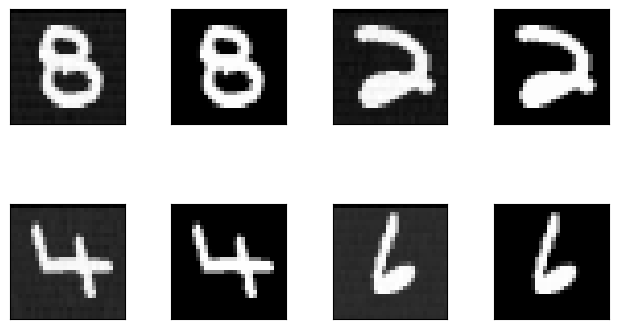

In [2]:
main(contact=True,col=False,overlap=True,m=4,stride = 3)

In binary view(the backgorud and the digit), this approach can give a relative clear pattern. However,there still exists noice.

2. We set block size to be 10 and stride to be 6. The dimension d is 160.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.063
epochs:[0],iteration:[250]/[1000],loss:0.027
epochs:[0],iteration:[500]/[1000],loss:0.026
epochs:[0],iteration:[750]/[1000],loss:0.027
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.029
epochs:[1],iteration:[250]/[1000],loss:0.022
epochs:[1],iteration:[500]/[1000],loss:0.024
epochs:[1],iteration:[750]/[1000],loss:0.026
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.028
epochs:[2],iteration:[250]/[1000],loss:0.021
epochs:[2],iteration:[500]/[1000],loss:0.023
epochs:[2],iteration:[750]/[1000],loss:0.026
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.028
epochs:[3],iteration:[250]/[1000],loss:0.023
epochs:[3],iteration:[500]/[1000],loss:0.023
epochs:[3],iteration:[750]/[1000],loss:0.026
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.027
epochs:[4],iteration:[250]/[1000],loss:0.021
epochs:[4],iteration:[500]/[1000],loss:0.023
epochs:[4],iteration:[750]/[1000],loss:0.025


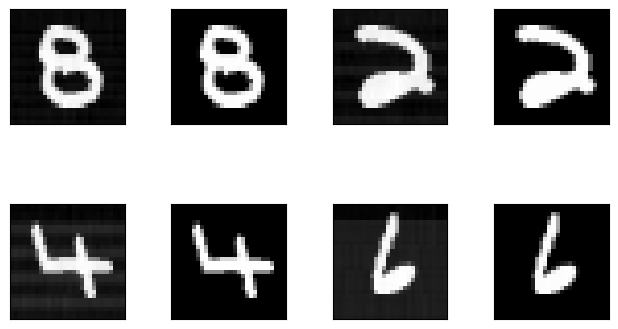

In [3]:
main(contact=True,col=False,overlap=True,m=10,stride = 6)

We set block size to be 8 and stride to be 4. The dimension d is 200.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.096
epochs:[0],iteration:[250]/[1000],loss:0.005
epochs:[0],iteration:[500]/[1000],loss:0.003
epochs:[0],iteration:[750]/[1000],loss:0.003
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.003
epochs:[1],iteration:[250]/[1000],loss:0.002
epochs:[1],iteration:[500]/[1000],loss:0.002
epochs:[1],iteration:[750]/[1000],loss:0.002
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.002
epochs:[2],iteration:[250]/[1000],loss:0.002
epochs:[2],iteration:[500]/[1000],loss:0.002
epochs:[2],iteration:[750]/[1000],loss:0.002
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.002
epochs:[3],iteration:[250]/[1000],loss:0.002
epochs:[3],iteration:[500]/[1000],loss:0.001
epochs:[3],iteration:[750]/[1000],loss:0.002
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.002
epochs:[4],iteration:[250]/[1000],loss:0.002
epochs:[4],iteration:[500]/[1000],loss:0.001
epochs:[4],iteration:[750]/[1000],loss:0.001


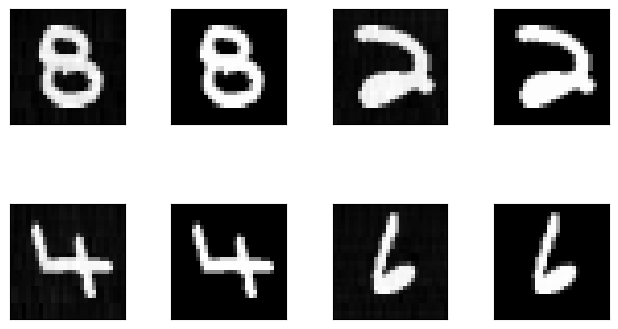

In [4]:
main(contact=True,col=False,overlap=True,m=8,stride = 4)

We set block size to be 8 and slight increase stride. The dimension d is 128.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.094
epochs:[0],iteration:[250]/[1000],loss:0.030
epochs:[0],iteration:[500]/[1000],loss:0.029
epochs:[0],iteration:[750]/[1000],loss:0.031
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.032
epochs:[1],iteration:[250]/[1000],loss:0.025
epochs:[1],iteration:[500]/[1000],loss:0.026
epochs:[1],iteration:[750]/[1000],loss:0.029
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.031
epochs:[2],iteration:[250]/[1000],loss:0.023
epochs:[2],iteration:[500]/[1000],loss:0.025
epochs:[2],iteration:[750]/[1000],loss:0.029
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.030
epochs:[3],iteration:[250]/[1000],loss:0.024
epochs:[3],iteration:[500]/[1000],loss:0.025
epochs:[3],iteration:[750]/[1000],loss:0.028
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.030
epochs:[4],iteration:[250]/[1000],loss:0.023
epochs:[4],iteration:[500]/[1000],loss:0.025
epochs:[4],iteration:[750]/[1000],loss:0.028


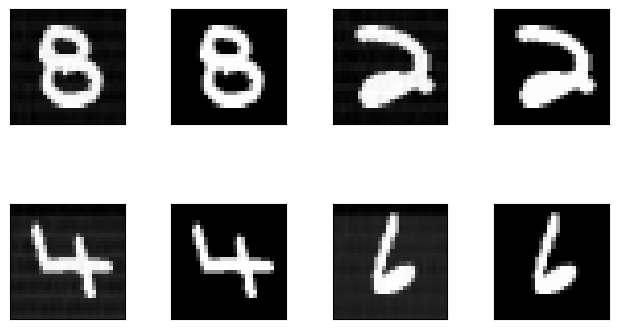

In [5]:
main(contact=True,col=False,overlap=True,m=8,stride = 5)

Compare above adjustment of block size and stride length,we found that relative larger blocksize and stride length can effectively reduce the number of model parameters while keep good performance. In general, block size = 8 and stride = 5 is the best settings.

# 2. Visualize of Distance

The matrix u has same dimention(n*d) with input data. We construct ui as a soft lookup of values compatible with xi
’ 
key: we sum up the value of each object xj proportional to the compatibility of xi with j o Sinceach ui denote the weight assign to each xi based on overall information, we would expect more geometric distance between each ui(capture difference information between xi).eHere,we try to compare each u with different data input format to compare their performance.  
We select the matix u in last iteration to visualize distance between ui by PCA analysi
First,we try the sample without using any blocks format.(n=8,number of ui is 8)s.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.254
epochs:[0],iteration:[250]/[1000],loss:0.913
epochs:[0],iteration:[500]/[1000],loss:0.923
epochs:[0],iteration:[750]/[1000],loss:0.972
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.993
epochs:[1],iteration:[250]/[1000],loss:0.909
epochs:[1],iteration:[500]/[1000],loss:0.922
epochs:[1],iteration:[750]/[1000],loss:0.971
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.993
epochs:[2],iteration:[250]/[1000],loss:0.909
epochs:[2],iteration:[500]/[1000],loss:0.921
epochs:[2],iteration:[750]/[1000],loss:0.971
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.993
epochs:[3],iteration:[250]/[1000],loss:0.909
epochs:[3],iteration:[500]/[1000],loss:0.921
epochs:[3],iteration:[750]/[1000],loss:0.971
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.994
epochs:[4],iteration:[250]/[1000],loss:0.909
epochs:[4],iteration:[500]/[1000],loss:0.921
epochs:[4],iteration:[750]/[1000],loss:0.971


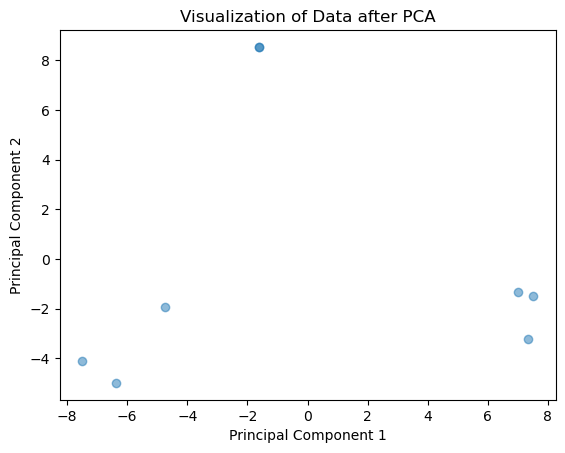

In [3]:
main(d=98,contact = False,u_visualize = True)

Then, we try sample from previous section(block size = 8 and stride = 4).(n=8, number of ui is 8)

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.000
epochs:[0],iteration:[250]/[1000],loss:0.005
epochs:[0],iteration:[500]/[1000],loss:0.004
epochs:[0],iteration:[750]/[1000],loss:0.003
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.003
epochs:[1],iteration:[250]/[1000],loss:0.002
epochs:[1],iteration:[500]/[1000],loss:0.002
epochs:[1],iteration:[750]/[1000],loss:0.002
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.003
epochs:[2],iteration:[250]/[1000],loss:0.002
epochs:[2],iteration:[500]/[1000],loss:0.002
epochs:[2],iteration:[750]/[1000],loss:0.002
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.002
epochs:[3],iteration:[250]/[1000],loss:0.002
epochs:[3],iteration:[500]/[1000],loss:0.001
epochs:[3],iteration:[750]/[1000],loss:0.002
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.002
epochs:[4],iteration:[250]/[1000],loss:0.001
epochs:[4],iteration:[500]/[1000],loss:0.001
epochs:[4],iteration:[750]/[1000],loss:0.001


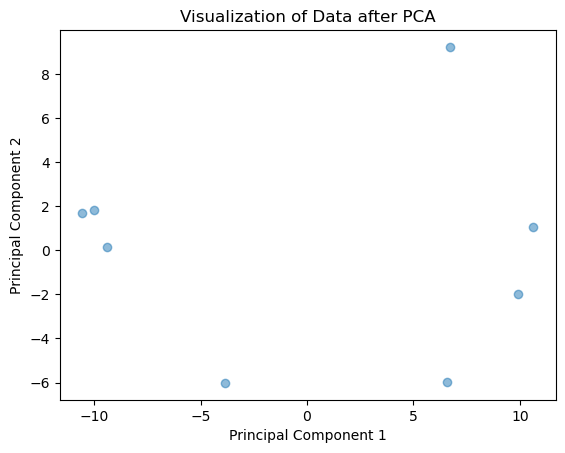

In [6]:
main(contact = True,col =  False, overlap=True,m=8,stride = 4,u_visualize = True)

Compare two pictures, we can observe that the second settings give slightly more sparse picture(less clustering).Different ui are more distinguishable due to encoding positional information by overlap blocks. The clustering pattern in first example is not preferred since not well capture infomation of xi.

# 3. Test with positional encoding function

Instead of using blocks, we can try to embbding location information for each xi (i=1,...,n) by introduce positional encoding.
This information can be coded as data in which unique weights are assigned to each position. By adding up original data and positional data, we can combine the location information. By this method, we may have less parameter size. Here we try one method of positional encoding:
![positional encoding](../formulas/position_encode.png)

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:0.737
epochs:[0],iteration:[250]/[1000],loss:0.309
epochs:[0],iteration:[500]/[1000],loss:0.306
epochs:[0],iteration:[750]/[1000],loss:0.297
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.301
epochs:[1],iteration:[250]/[1000],loss:0.289
epochs:[1],iteration:[500]/[1000],loss:0.292
epochs:[1],iteration:[750]/[1000],loss:0.288
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.295
epochs:[2],iteration:[250]/[1000],loss:0.283
epochs:[2],iteration:[500]/[1000],loss:0.288
epochs:[2],iteration:[750]/[1000],loss:0.285
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.292
epochs:[3],iteration:[250]/[1000],loss:0.281
epochs:[3],iteration:[500]/[1000],loss:0.287
epochs:[3],iteration:[750]/[1000],loss:0.285
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.290
epochs:[4],iteration:[250]/[1000],loss:0.279
epochs:[4],iteration:[500]/[1000],loss:0.285
epochs:[4],iteration:[750]/[1000],loss:0.283


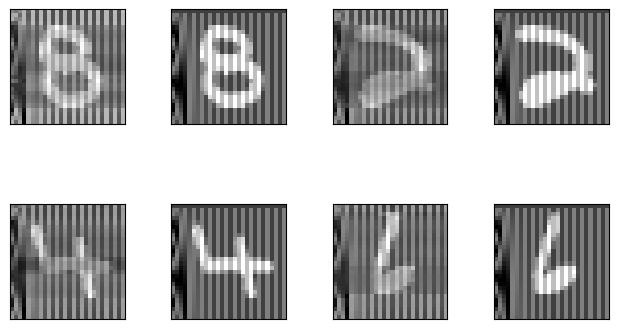

In [7]:
main(pos=True)

Based on loss function, the result is good with small number of parameters(d=28). However, introducing coding positional embeddings may conceal original picture, which make evaluate performance by visualization no longer oblivious . It is not encourage to apply this method in picture copy/mimic, but can be used in other future cases.